In [ ]:
pip install -q tensorflow tensorflow-datasets

In [ ]:
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
import numpy as np
import tensorflow_datasets as tfds
tfds.disable_progress_bar()

In [ ]:
tfds.list_builders()

['abstract_reasoning',
 'accentdb',
 'aeslc',
 'aflw2k3d',
 'ag_news_subset',
 'ai2_arc',
 'ai2_arc_with_ir',
 'amazon_us_reviews',
 'anli',
 'arc',
 'bair_robot_pushing_small',
 'bccd',
 'beans',
 'big_patent',
 'bigearthnet',
 'billsum',
 'binarized_mnist',
 'binary_alpha_digits',
 'blimp',
 'bool_q',
 'c4',
 'caltech101',
 'caltech_birds2010',
 'caltech_birds2011',
 'cars196',
 'cassava',
 'cats_vs_dogs',
 'celeb_a',
 'celeb_a_hq',
 'cfq',
 'chexpert',
 'cifar10',
 'cifar100',
 'cifar10_1',
 'cifar10_corrupted',
 'citrus_leaves',
 'cityscapes',
 'civil_comments',
 'clevr',
 'clic',
 'clinc_oos',
 'cmaterdb',
 'cnn_dailymail',
 'coco',
 'coco_captions',
 'coil100',
 'colorectal_histology',
 'colorectal_histology_large',
 'common_voice',
 'coqa',
 'cos_e',
 'cosmos_qa',
 'covid19sum',
 'crema_d',
 'curated_breast_imaging_ddsm',
 'cycle_gan',
 'deep_weeds',
 'definite_pronoun_resolution',
 'dementiabank',
 'diabetic_retinopathy_detection',
 'div2k',
 'dmlab',
 'downsampled_imagenet',
 

In [ ]:
builder = tfds.builder('mnist')
info=builder.info
print(info)

tfds.core.DatasetInfo(
    name='mnist',
    version=3.0.1,
    description='The MNIST database of handwritten digits.',
    homepage='http://yann.lecun.com/exdb/mnist/',
    features=FeaturesDict({
        'image': Image(shape=(28, 28, 1), dtype=tf.uint8),
        'label': ClassLabel(shape=(), dtype=tf.int64, num_classes=10),
    }),
    total_num_examples=70000,
    splits={
        'test': 10000,
        'train': 60000,
    },
    supervised_keys=('image', 'label'),
    citation="""@article{lecun2010mnist,
      title={MNIST handwritten digit database},
      author={LeCun, Yann and Cortes, Corinna and Burges, CJ},
      journal={ATT Labs [Online]. Available: http://yann.lecun.com/exdb/mnist},
      volume={2},
      year={2010}
    }""",
    redistribution_info=,
)



In [ ]:
ds_train=tfds.load(name='mnist',split='train')
ds_test=tfds.load(name='mnist',split='test')

In [ ]:
train_images=np.array([example['image'].numpy()[:,:,:] for example in ds_train])
test_images=np.array([example['image'].numpy()[:,:,:] for example in ds_test])

train_labels=np.array([example['label'].numpy() for example in ds_train])
test_labels=np.array([example['label'].numpy() for example in ds_test])


In [140]:
model=keras.Sequential([
                        keras.layers.Conv2D(16,7,input_shape=(28,28,1),activation='relu'),
                        keras.layers.Conv2D(8,3,activation='relu'),
                        keras.layers.Dropout(.2),
                        keras.layers.Flatten(),
                        keras.layers.Dense(32,activation='relu'),
                        keras.layers.Dropout(.2),
                        keras.layers.Dense(64,activation='relu'),
                        keras.layers.Dense(10,activation='softmax')
])

model.compile(
               optimizer='adam',
               loss=keras.losses.SparseCategoricalCrossentropy(),
               metrics=['accuracy']
)

model.fit(train_images,train_labels,epochs=320,batch_size=256)
print("EVALUATE")
model.evaluate(test_images,test_labels)

Epoch 1/320
235/235 [==============================] - 2s 5ms/step - loss: 0.9458 - accuracy: 0.7061
Epoch 2/320
235/235 [==============================] - 1s 4ms/step - loss: 0.3126 - accuracy: 0.8992
Epoch 3/320
235/235 [==============================] - 1s 4ms/step - loss: 0.2106 - accuracy: 0.9321
Epoch 4/320
235/235 [==============================] - 1s 4ms/step - loss: 0.1672 - accuracy: 0.9464
Epoch 5/320
235/235 [==============================] - 1s 4ms/step - loss: 0.1438 - accuracy: 0.9538
Epoch 6/320
235/235 [==============================] - 1s 4ms/step - loss: 0.1264 - accuracy: 0.9600
Epoch 7/320
235/235 [==============================] - 1s 4ms/step - loss: 0.1106 - accuracy: 0.9655
Epoch 8/320
235/235 [==============================] - 1s 4ms/step - loss: 0.1022 - accuracy: 0.9676
Epoch 9/320
235/235 [==============================] - 1s 4ms/step - loss: 0.0963 - accuracy: 0.9694
Epoch 10/320
235/235 [==============================] - 1s 4ms/step - loss: 0.0902 - accura

[0.06623423099517822, 0.9878000020980835]

6


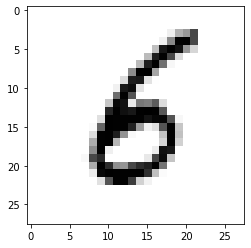

In [141]:
im=test_images[100]
im=np.asarray(im[:,:,0])
plt.imshow(im,cmap='Greys')
im=np.reshape(im,(1,28,28,1))
result=np.round(model.predict(im))
print(np.argmax(result))

5


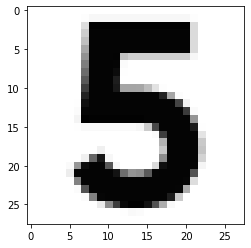

In [138]:
import imageio
img=imageio.imread('./drive/MyDrive/five.png')
img=(np.asarray(img[:,:,0]))
for x in range(0,28):
  for y in range(0,28):
    img[x][y]=abs(img[x][y]-255)

#print(img.shape)
#print(img)
plt.imshow(img,cmap='Greys')
img=np.reshape(img,(1,28,28,1))
result=np.round(model.predict(img))
print(np.argmax(result))